In [1]:
%pip install "pycaret[full]"

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
data = pd.read_csv("air4thai_44t_2024-02-01_2024-02-29.csv")
del data['Unnamed: 0']
data


,DATETIMEDATA,PM25,WS,RH
0,2024-02-01 00:00:00,19.6,0,82
1,2024-02-01 01:00:00,19.2,0,85
2,2024-02-01 02:00:00,19.0,0,86
3,2024-02-01 03:00:00,17.8,0,88
4,2024-02-01 04:00:00,13.8,0,89
...,...,...,...,...
395,2024-02-17 11:00:00,21.3,1,50
396,2024-02-17 12:00:00,23.2,1,46
397,2024-02-17 13:00:00,20.8,1,40
398,2024-02-17 14:00:00,15.6,1,42


<Axes: >

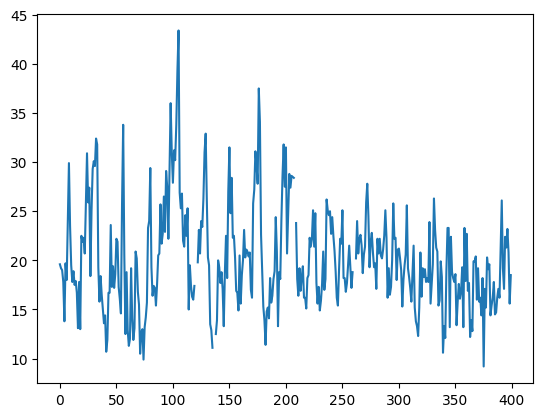

In [3]:
data['PM25'].plot()

In [4]:
data.dtypes

DATETIMEDATA     object
PM25            float64
WS                int64
RH                int64
dtype: object

In [5]:
data['DATETIMEDATA'] = pd.to_datetime(data['DATETIMEDATA'])

In [6]:
data.dtypes

DATETIMEDATA    datetime64[ns]
PM25                   float64
WS                       int64
RH                       int64
dtype: object

In [7]:
data.set_index('DATETIMEDATA',
               drop=True,
               inplace=True)

In [8]:
data.head()

,PM25,WS,RH
DATETIMEDATA,,,
2024-02-01 00:00:00,19.6,0,82
2024-02-01 01:00:00,19.2,0,85
2024-02-01 02:00:00,19.0,0,86
2024-02-01 03:00:00,17.8,0,88
2024-02-01 04:00:00,13.8,0,89


<Axes: xlabel='DATETIMEDATA'>

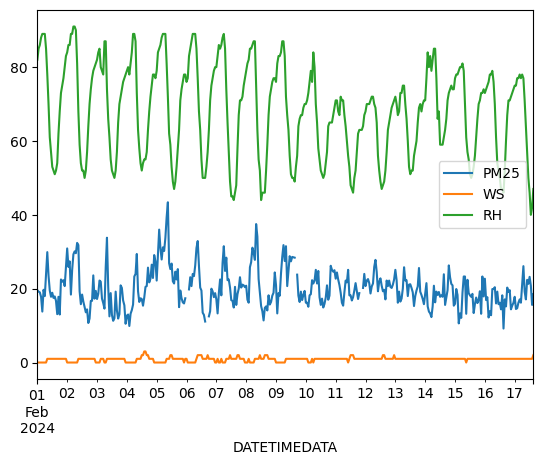

In [9]:
data.plot()

In [10]:
data.info()
mean_pm = data['PM25'].mean()
data['PM25'].fillna(mean_pm, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 400 entries, 2024-02-01 00:00:00 to 2024-02-17 15:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    393 non-null    float64
 1   WS      400 non-null    int64  
 2   RH      400 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 12.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 400 entries, 2024-02-01 00:00:00 to 2024-02-17 15:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    400 non-null    float64
 1   WS      400 non-null    int64  
 2   RH      400 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 12.5 KB


In [11]:
from pycaret.time_series import *
s = setup(data,
          target="PM25",
          fold=3,
          fh=50,
          session_id=123)

,Description,Value
0,session_id,123
1,Target,PM25
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(400, 3)"
5,Transformed data shape,"(400, 3)"
6,Transformed train set shape,"(350, 3)"
7,Transformed test set shape,"(50, 3)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [12]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,400.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,20.123664
3,Summary,Statistics,Transformed,Median,,19.3
4,Summary,Statistics,Transformed,Standard Deviation,,5.15316
5,Summary,Statistics,Transformed,Variance,,26.555062
6,Summary,Statistics,Transformed,Kurtosis,,1.409903
7,Summary,Statistics,Transformed,Skewness,,0.898988
8,Summary,Statistics,Transformed,# Distinct Values,,171.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",501.506341


In [13]:
plot_model()

In [14]:
plot_model(plot = 'train_test_split')

In [15]:
best = compare_models(sort = 'MAE')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.7041,0.6616,2.9977,3.7698,0.1572,0.1496,-0.2591,0.2967
croston,Croston,0.7164,0.6538,3.0445,3.7147,0.1673,0.1523,-0.1841,0.3967
auto_arima,Auto ARIMA,0.7524,0.7337,3.1933,4.1679,0.1691,0.1593,-0.4794,1.3000
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.7663,0.7302,3.2473,4.1410,0.1765,0.1609,-0.4759,0.1967
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.7643,0.7140,3.2615,4.0780,0.1649,0.1655,-0.4458,0.4567
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7645,0.7207,3.2691,4.1245,0.1670,0.1650,-0.4289,0.2433
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8116,0.7767,3.4291,4.3956,0.1850,0.1702,-0.7000,0.2600
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.8116,0.7767,3.4291,4.3955,0.1850,0.1702,-0.7000,0.2433
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.8124,0.7620,3.4705,4.3572,0.1748,0.1770,-0.6930,0.4567
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8251,0.7882,3.4852,4.4596,0.1877,0.1731,-0.7546,0.7500


In [16]:
best

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                   n_jobs=1)],
                    regressor=AdaBoostRegressor(random_state=123), sp=2,
                    window_length=2)

In [17]:
best.get_params()

{'degree': 1,
 'deseasonal_model': 'additive',
 'fe_target_rr': [WindowSummarizer(lag_feature={'lag': [2, 1]}, n_jobs=1)],
 'regressor': AdaBoostRegressor(random_state=123),
 'sp': 2,
 'window_length': 2,
 'regressor__estimator': None,
 'regressor__learning_rate': 1.0,
 'regressor__loss': 'linear',
 'regressor__n_estimators': 50,
 'regressor__random_state': 123}

In [18]:
predict_model(best, fh = 24)

,y_pred
2024-02-15 14:00,17.4789
2024-02-15 15:00,17.8113
2024-02-15 16:00,17.4715
2024-02-15 17:00,17.8039
2024-02-15 18:00,17.7468
2024-02-15 19:00,18.0792
2024-02-15 20:00,17.7395
2024-02-15 21:00,18.0719
2024-02-15 22:00,17.7321
2024-02-15 23:00,18.0645


In [19]:
final_best = finalize_model(best)

In [20]:
plot_model(best, plot = 'forecast')

In [21]:
predict_model(final_best,
              fh = 24)

ValueError: Model was trained with exogenous variables but you have not passed any for predictions. Please pass exogenous variables to make predictions.

In [22]:
plot_model(final_best, plot = 'forecast')

ValueError: Model was trained with exogenous variables but you have not passed any for predictions. Please pass exogenous variables to make predictions.